In [33]:
import matplotlib.pyplot as plt
import matrices.indexing as mindexing

data_path = "resources/aminer/v1"

csr_matrix_jaccard = mindexing.load_matrix_jaccard_sim(data_path)

Loading indexed jaccard ...
998 998 117918


In [34]:
print(csr_matrix_jaccard.ndim, csr_matrix_jaccard.shape)

2 (998, 998)


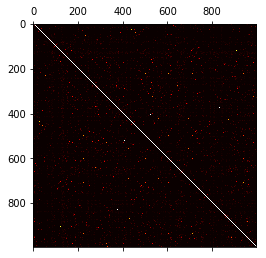

In [35]:
plt.matshow(csr_matrix_jaccard.toarray(), cmap='hot')
plt.show()

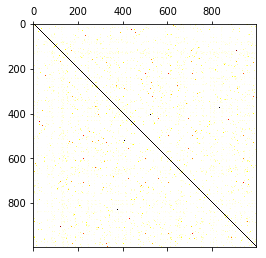

In [36]:
plt.matshow(1 - csr_matrix_jaccard.todense(), cmap='hot')
plt.show()